In [ ]:
!pip install matplotlib seaborn scipy

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('Data/data.csv')

# Display first few rows to confirm it loaded
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

### Part 1: The 10-Point Data Inspection

In [22]:
# Step 1
print('Print the "Data Shape":\nNumber of Rows, Number of Features:')
print(df.shape)

Print the "Data Shape":
Number of Rows, Number of Features:
(569, 33)


**Understanding df.shape**
```
This cell prints the shape of the dataset (there are 569 rows or samples and 33 columns or features for each sample).
```
- How many rows (observations/patients)? 569
- How many columns (features)? 33
- What does each row represent in clinical terms? Each row represents a cytological sample (a sample of cells) from an individual's breast cancer.

In [23]:
# Step 2
print("List of columns:\n")
print(df.columns)

List of columns:

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


**Understanding df.columns**
```
This cell prints a list of the name for each column. This helps us understand what analysis we are able to do with the data // The 'Unnamed: 32' is an artifact from how the file was saved and the data contains an extra column that is blank.

Each of the features is a variable that we can analyze.

The naming pattern is suffix-based:

The columns that end with _mean are showing the average (mean) of the feature value across the sample.

The columns that end with _se are showing the "standard error" of the feature or the variability/spread of that feature's measurements.

The columns that end with _worst are showing the largest/most severe value of the feature.

Some columns that may need further research are compactness, concavity, concave points, and fractal_dimension. These values come from specific nuclear geometry computations rather than direct measurements.
```

In [24]:
# Extract and display only the base feature names (without _mean, _se, _worst)
raw_features = str(df.columns)
processed_features = raw_features.strip('Index')
processed_features = processed_features.replace('\n','')
processed_features = processed_features.replace(',','\n')
processed_features = processed_features.split('\n')
def ProcessText(features):
    max_runs = (len(processed_features)-1)
    x = 0
    for i in processed_features:
        processed_features[x] = i.strip("([ ])")
        processed_features[x] = processed_features[x].replace("_se","")
        processed_features[x] = processed_features[x].replace("_mean","")
        processed_features[x] = processed_features[x].replace("_worst","")
        if x == max_runs:
            return processed_features
        else:
            x += 1
features_processed = ProcessText(processed_features)
print(features_processed)

["'id'", "'diagnosis'", "'radius'", "'texture'", "'perimeter'", "'area'", "'smoothness'", "'compactness'", "'concavity'", "'concave points'", "'symmetry'", "'fractal_dimension'", "'radius'", "'texture'", "'perimeter'", "'area'", "'smoothness'", "'compactness'", "'concavity'", "'concave points'", "'symmetry'", "'fractal_dimension'", "'radius'", "'texture'", "'perimeter'", "'area'", "'smoothness'", "'compactness'", "'concavity'", "'concave points'", "'symmetry'", "'fractal_dimension'", "'Unnamed: 32'", "dtype='object'"]


**Above cell is a list of all column names**  
*Note: the suffixes have been removed due to the instructions in breast_cancer_10point_problems. (these were Standard Error: _se, _mean, and _worst)*


In [25]:
# Step 3
print("Features:                 Data Type:\n")
print(df.dtypes)

Features:                 Data Type:

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst

**Understanding df.dtypes**
```
This cell prints the name of each column (features) and the data type for each.
```
- All of the columns are numeric except for `diagnosis` and the final column which is unnamed (`id` is int64 while the remaining columns are float64)

- The `diagnosis` column is an "object" type

- Are there any data types that seem incorrect? The final column is unnamed and has no values in any of the rows. However, this column is still counted as float64 and all of the values are NaN

In [26]:
# Step 4
print("First Few Rows:\n")
print(df.head())

First Few Rows:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

**Understanding df.head()**
```
This cell prints the the first 5 rows (0-4) under the name for each column
```
- Most of the values are floating point numbers and a significant amount of them are **<1**

- Do you notice anything unusual or unexpected? Only the previously mentioned unnamed column with no values.

- What are the possible values for the `diagnosis` column? **"M"** for malignant or **"B"** for benign.

In [27]:
# Step 5
print("Last Few Rows:\n")
print(df.tail())

Last Few Rows:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter

**Understanding df.tail()**
```
This cell prints the the last 5 rows (in this dataset rows 564-568) under the name for each column
```
- This data ends clearly
- The last rows **do** seem consistent with the first rows.

In [28]:
# Step 6
print("Features:                 MemoryUsage:\n")
print(df.memory_usage(deep=True))
print("\nTotal usage (bytes):")
print(df.memory_usage(deep=True).sum())

Features:                 MemoryUsage:

Index                        132
id                          4552
diagnosis                  28450
radius_mean                 4552
texture_mean                4552
perimeter_mean              4552
area_mean                   4552
smoothness_mean             4552
compactness_mean            4552
concavity_mean              4552
concave points_mean         4552
symmetry_mean               4552
fractal_dimension_mean      4552
radius_se                   4552
texture_se                  4552
perimeter_se                4552
area_se                     4552
smoothness_se               4552
compactness_se              4552
concavity_se                4552
concave points_se           4552
symmetry_se                 4552
fractal_dimension_se        4552
radius_worst                4552
texture_worst               4552
perimeter_worst             4552
area_worst                  4552
smoothness_worst            4552
compactness_worst           4552
con

**Understanding df.memory_usage()**
```
This cell prints the memory usage of each column in bytes.
```
- This dataset is only 174.246 KB
- This is a small dataset as large ones can be multiple gigabytes.

In [29]:
# Step 7
print("Features:                Null Data:\n")
print(df.isnull().sum())

Features:                Null Data:

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fr

**Understanding df.isnull.sum()**
```
This cell prints all of the features and a count of the rows that have null values within that category
```

In [30]:
# Step 8
print("Identify Duplicate Rows:\n")
feature_check = "id"
x = df.duplicated(subset=[feature_check])
if df.duplicated().any():
    print(f"❌ There are some duplicated rows in the dataset.")
else:
    print(f"✅ The dataset has no duplicated rows.")
if x.any():
    print(f"❌ There are some duplicated values in the `{feature_check}` column.")
else:
    print(f"✅ The `{feature_check}` column has no duplicated values.")

Identify Duplicate Rows:

✅ The dataset has no duplicated rows.
✅ The `id` column has no duplicated values.


**Understanding df.duplicated()**
```
This cell prints a list of the rows and an indication of if it is a duplicate of another row.
```
- Are there any duplicate rows? The dataset has no duplicated rows.
- Are all patient IDs unique? Yes. The `id` column has no duplicated values.

In [31]:
# Step 9
print("Overview / Summary of Data:\n")
print(df.describe())

Overview / Summary of Data:

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.

**Understanding df.describe()**
```
This cell prints an overview of the data. It summarizes each feature with a count, mean, standard deviation, minimum value, lower percentile (25%), median (50%), upper percentile (75%), and maximum value
```
- What is the radius_mean range in the dataset? 6.981000 to 28.110000
- What is the range of area_mean values? 143.500000 to 2501.000000
- What is the range of concavity_mean values? 0.000000 to 0.426800
- Do any min/max values seem impossible or clinically unlikely? No, none of the data seems clinically unlikely.

In [32]:
# Step 10
print("Number of Unique Values:")
print("Features:                 Unique Values:\n")
print(df.nunique())

Number of Unique Values:
Features:                 Unique Values:

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
sym

**Understanding df.nunique()**
```
This cell prints the number of nuique values for each feature. Some cells have more unique values than others, this is the cardinality of the value
```
- Which columns have very few unique values (likely categorical)? Only the diagnosis column.

- Which columns have many unique values (likely continuous)? All of the other columns have many unique values. `fractal_dimension_se` has the most with 545.

- Does the number of unique IDs match the number of rows? Yes there are 569 unique values and 569 rows.

### Part 2: Data Dictionary

| Column | Description | Feature Type | Valid Values/Range | Notes/Issues |
|--------|-------------|--------------|-------------------|--------------|
| `id` |Unique identifier| int64 |>0 (5-8 digits)|Unique per sample|
| `diagnosis` |Benign `B` or malignant `M`|Object|`M`, `B`|212 `M`, 357 `B`|
| `radius_mean` |Average distance from the center of the cell to its perimeter|float64|Non-negative numbers|Smaller are often benign in this dataset|
| `texture_mean` |standard deviation of gray-scale values within the nucleus|float64|Non-negative numbers|How "rough" the nucleus appears|
| `perimeter_mean` |Average length of the cell's perimeter|float64|Non-negative numbers| |
| `area_mean` |Average area if the nucleus|float64|Non-negative numbers|Larger area = bigger cells|
| `smoothness_mean` |Local variation in nuclear contour|float64|Non-negative numbers|Irregularity|
| `compactness_mean` |Measure of how "compact" or dense the nucleus shape is|float64|Non-negative numbers|perimeter² / area − 1.0|
| `concavity_mean` |Severity of inward indentations/concavities|float64|Non-negative numbers|Depth of dents|
| `concave points_mean` |Number of of inward indentations/concavities|float64|Non-negative numbers|Count of depths|
| `symmetry_mean` |How symmetric the nuclear contours are|float64|Non-negative numbers|1.0 = Perfect symmetry (>1.0: Possible if implementation allows (e.g., asymmetric distortion metrics))|
| `fractal_dimension_mean` |Measures the roughness/complexity of the nuclear boundary using fractal scaling principles|float64|Non-negative numbers|Theoretical minimum is ~0|

**1. What is cell morphology in the context of cancer diagnosis? Why is the shape of cell nuclei an important indicator of malignancy?**

Your answer: Morphology is the cells external structure, shape, size, and generally how it looks.

---

**2. Explain what "concavity" and "concave points" measure. Why might cancer cells have more irregular, concave boundaries?**

Your answer: Concavity and concave points measure the amount and severity of indentations in the nucleus. Cancer cells develop more irregular concave boundaries based on a number of factors including dysregulated growth mechanics and genomic instability.

---

**3. What is pleomorphism in cancer cells? How does it relate to the variation measurements (standard error) in this dataset?**

Your answer: Pleomorphism is the variation in cell size and shape within a tumor sample. The variation measurements directly quantify pleomorphism.

---

**4. How do pathologists traditionally examine FNA samples? What advantages does computational analysis provide over manual examination?**

Your answer: Pathologists traditionally examine FNA samples using microscopes. Benefits of computational analysis include speed and accuracy when compared to human eyes.

### Part 3: Data Validation

#### 3.1 Diagnosis Distribution Validation

In [33]:
dx_counts = df['diagnosis'].value_counts().tolist()
dx_m_count = dx_counts[1]
dx_b_count = dx_counts[0]
dx_count_all = dx_b_count + dx_m_count
print(f"Malignant (M): {dx_m_count} ({(dx_m_count/dx_count_all):.2%}) \nBenign    (B): {dx_b_count} ({(dx_b_count/dx_count_all):.2%})")

Malignant (M): 212 (37.26%) 
Benign    (B): 357 (62.74%)


```
This dataset is weighted towards the Benign diagnosis with just under 2/3 of the cases.
According to the Breast Cancer Research Foundation, roughly 75% of biopsies performed in the U.S. are benign¹.

1.Brown J. What Is a Breast Biopsy? Breast Cancer Research Foundation. March 21, 2025. Accessed February 12, 2026. https://www.bcrf.org/about-breast-cancer/breast-biopsy/
```

#### 3.2 Empty Column Validation

In [34]:
null_summary = df.isnull().sum()
empty_columns = null_summary[null_summary == len(df)].index.tolist()
print(empty_columns)

['Unnamed: 32']


```
There is one empty column in this dataset. This is due to trailing commas in the csv file. The following code block will drop this before we begin the analysis.
```

In [35]:
null_summary = df.isnull().sum()
empty_columns = null_summary[null_summary == len(df)].index.tolist()
df = df.iloc[:, :-1]
empty_columns
if empty_columns == []:
    print("Successfully dropped empty columns.")

#### 3.3 Feature Range Validation

In [36]:
col_map = {
    'radius': ('radius_mean', 'radius_worst'),
    'texture': ('texture_mean', 'texture_worst'),
    'perimeter': ('perimeter_mean', 'perimeter_worst'),
    'area': ('area_mean', 'area_worst'),
    'smoothness': ('smoothness_mean', 'smoothness_worst'),
    'compactness': ('compactness_mean', 'compactness_worst'),
    'concavity': ('concavity_mean', 'concavity_worst'),
    'concave points': ('concave points_mean', 'concave points_worst'),  # Space!
    'symmetry': ('symmetry_mean', 'symmetry_worst'),
    'fractal_dimension': ('fractal_dimension_mean', 'fractal_dimension_worst')
}

violations = 0
for feature, (mean_col, worst_col) in col_map.items():
    # Verify columns exist
    if mean_col in df.columns and worst_col in df.columns:
        viol = (df[worst_col] < df[mean_col]).sum()
        violations += viol
        # print(f"{worst_col} >= {mean_col}: {viol} violations")
    else:
        print(f"Missing: {mean_col} or {worst_col}")

print(f"\nTotal violations: {violations}")


Total violations: 0



In this dataset: 

`radius_worst` **is** always >= `radius_mean`

**All** features that have a worst/mean column follow this rule

If this relationship was violated there would likely be an issue with the data


### Part 4: Create Cell Irregularity Groups

| Irregularity Category | Concavity Range | Clinical Rationale |
|-----------------------|-----------------|-------------------|
| Smooth | 0 - 0.03 | Minimal concavity, regular cell boundaries |
| Mild | 0.03 - 0.08 | Some irregularity, often seen in benign tumors |
| Moderate | 0.08 - 0.15 | Notable irregularity, warrants attention |
| Severe | 0.15 - 0.25 | High irregularity, suspicious for malignancy |
| Extreme | > 0.25 | Very irregular, strong indicator of malignancy |


In [37]:
bins = [0, 0.035, 0.085, 0.155, 0.255, np.inf]
labels = ['Smooth:', 'Mild:', 'Moderate:', 'Severe:', 'Extreme:']
df['irregularity_category'] = pd.cut(df['concavity_mean'], bins=bins, labels=labels, include_lowest=True)
print(df['irregularity_category'].value_counts().sort_index())

irregularity_category
Smooth:      172
Mild:        167
Moderate:    125
Severe:       83
Extreme:      22
Name: count, dtype: int64


Smooth:: 172 cases (2.91% Malignant)
Mild:: 167 cases (12.57% Malignant)
Moderate:: 125 cases (68.80% Malignant)
Severe:: 83 cases (97.59% Malignant)
Extreme:: 22 cases (86.36% Malignant)

Total malignant: 212 (37.26%)
Total benign: 357 (62.74%)
Total cases: 569


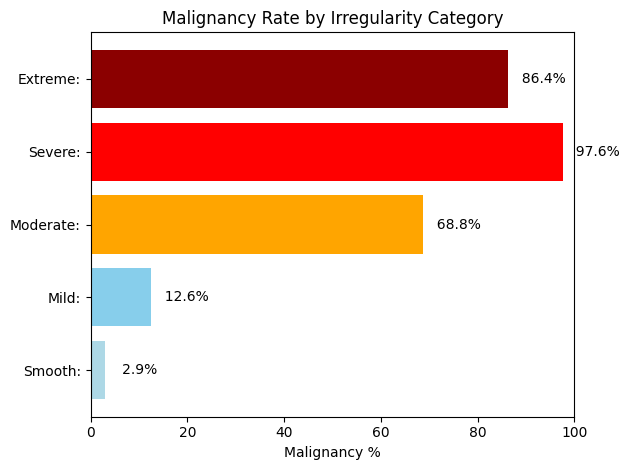

In [38]:
# Blank vars to store data
category_counts = {}
malignancy_data = []
malignancy_category_count = 0
benign_category_count = 0

# Loop through the categories to calculate counts and percentages
for category in df['irregularity_category'].cat.categories:
    count = len(df[df['irregularity_category'] == category])
    category_counts[category] = count
    malignant_in_category = len(df[(df['irregularity_category'] == category) & (df['diagnosis'] == 'M')])
    benign_in_category = count - malignant_in_category 
    malignancy_category_count += malignant_in_category
    benign_category_count += benign_in_category
    malignancy_percent = (malignant_in_category/count)
    malignancy_percent_string = f"{malignancy_percent:0.2%}"
    benign_percent = (benign_in_category/count)
    benign_percent_string = f"{benign_percent:0.2%}"
    
    malignancy_data.append(malignancy_percent)
    print(f"{category}: {count} cases ({malignancy_percent_string} Malignant)")

# Print total cases and percentages
total_case_count = malignancy_category_count + benign_category_count
print(f"\nTotal malignant: {malignancy_category_count} ({(malignancy_category_count/total_case_count):.2%})")
print(f"Total benign: {benign_category_count} ({(benign_category_count/total_case_count):.2%})")
print("Total cases:", total_case_count)

# Use matplotlib to display a horizontal bar graph
plt.figure()
categories = list(category_counts.keys())
y = np.arange(len(categories))
count = 0
for pct in malignancy_data:
    malignancy_data[count] = pct * 100 # Turn the raw decimal into a percent by multiplying by 100
    count += 1

plt.barh(y, malignancy_data, color=['lightblue', 'skyblue', 'orange', 'red', 'darkred'])
plt.yticks(y, categories)
plt.xlabel('Malignancy %')
plt.title('Malignancy Rate by Irregularity Category')
plt.xlim(0, 100)

# Label graph
for i, pct in enumerate(malignancy_data):
    plt.text(pct + 1, i, f'{pct:6.1f}%', va='center')
    
# Display the graph
plt.tight_layout()
plt.show()

#### Analysis Questions:

**1. How many tumors are in each irregularity category?**

Your answer:  
    Smooth:      172  
    Mild:        167  
    Moderate:    125  
    Severe:       83  
    Extreme:      22  

---

**2. What is the malignancy rate (percentage) for each irregularity category?**

Your answer:  
    Smooth:    2.91%  
    Mild:     12.57%  
    Moderate: 68.80%  
    Severe:   97.59%  
    Extreme:  86.36%  


---

**3. At what level of concavity does malignancy rate sharply increase? Does cell shape irregularity appear to be a strong predictor of cancer?**

Your answer:  
    Moderate

---

**4. Why might severely irregular cell boundaries be associated with malignancy? (Think about how cancer cells grow and divide.)**

Your answer:  
    As the cells grow they rapidly change and deform
---

### Part 5: Research Questions

#### 5.1 Three Answerable Questions

**1. A question about smoothness and diagnosis:**
How does the average smoothness (`smoothness_mean`) differ between benign (B) and malignant (M) tumors?

---

**2. A question comparing "concavity" vs "concave points":**
Do tumors with high concavity (`concavity_mean`) but few concave points (`concave points_mean`) show a different malignancy rate than tumors with many concave points but lower concavity?

---

**3. A question about fractal dimension combined with another feature:**
Among tumors with similar nuclear size (`radius_mean`), is a higher `fractal_dimension_mean` associated with a higher proportion of malignant cases?

---

#### 5.2 One Question the Data CANNOT Answer

**Question:**
Are patients with a family history of breast cancer more likely to have malignant tumors than patients without such a family history?

**Why it cannot be answered with this data:**
This dataset only contains measurements derived from cell images. We do not know anything else about the affected patients.

---

#### 5.3 Groupby Analysis
**"What is the average `concave points_mean` for each diagnosis category (M vs B)?"**

In [39]:
result = df.groupby('diagnosis')['concave points_mean'].mean()
print(result)

diagnosis
B    0.025717
M    0.087990
Name: concave points_mean, dtype: float64


**Interpretation:**

On average the malignant tumors have 0.062273 more `concave points_mean`. This is about 3x more, meaning this is a strong point to look at when comparing malignant vs benign cases from this dataset.

In [40]:

# 1. Show the distribution of diagnosis
print("Diagnosis distribution (counts):")
print(df["diagnosis"].value_counts())
print("\nDiagnosis distribution (proportions):")
print(df["diagnosis"].value_counts(normalize=True))

# 2. Calculate summary statistics for key features, grouped by diagnosis
key_features = ["radius_mean", "concavity_mean", "concave points_mean"]

group_summary = df.groupby("diagnosis")[key_features].describe()
print("\nSummary statistics for key features grouped by diagnosis:")
print(group_summary)


Diagnosis distribution (counts):
diagnosis
B    357
M    212
Name: count, dtype: int64

Diagnosis distribution (proportions):
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

Summary statistics for key features grouped by diagnosis:
          radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
B               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
M               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 concavity_mean            ...                   \
             max          count      mean  ...      75%     max   
diagnosis                                  ...                    
B          17.85          357.0  0.046058  ...  0.05999  0.4108   
M          28.11          212.0  0.160775  ...  0.20305  0.4268   

          concave poin